In [1]:
from konlpy.tag import Okt
from collections import Counter
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import matplotlib 
from IPython.display import set_matplotlib_formats
import numpy as np
from PIL import Image

In [19]:
# 토큰 str 불러오기
fr = open('../data/bluehouse_token.txt','r',encoding='CP949')
lists = fr.readlines()
fr.close()

In [20]:
# 토큰별 태그와 함께 튜플 리스트로 저장
okt = Okt()
morphs = []

for sentence in lists:
    morphs.append(okt.pos(sentence))

In [21]:
morphs

[[('제', 'Noun'),
  ('국민', 'Noun'),
  ('속', 'Noun'),
  ('부자', 'Noun'),
  ('입', 'Noun'),
  ('영등포구', 'Noun'),
  ('소재', 'Noun'),
  ('국', 'Noun'),
  ('공립', 'Noun'),
  ('어린이집', 'Noun'),
  ('육아휴직', 'Noun'),
  ('거부', 'Noun'),
  ('신고', 'Noun'),
  ('재활용', 'Noun'),
  ('제품', 'Noun'),
  ('사용', 'Noun'),
  ('규제', 'Noun'),
  ('강화', 'Noun'),
  ('백신', 'Noun'),
  ('미접', 'Noun'),
  ('종자', 'Noun'),
  ('치료', 'Noun'),
  ('비', 'Noun'),
  ('자', 'Noun'),
  ('부담', 'Noun'),
  ('검토', 'Noun'),
  ('반대', 'Noun'),
  ('우리', 'Noun'),
  ('평소', 'Noun'),
  ('신경', 'Noun'),
  ('버려진', 'Noun'),
  ('담배', 'Noun'),
  ('꽁초', 'Noun'),
  ('환경오염', 'Noun'),
  ('원인', 'Noun'),
  ('거', 'Noun'),
  ('알', 'Noun'),
  ('재건축', 'Noun'),
  ('재개발', 'Noun'),
  ('도시', 'Noun'),
  ('정', 'Noun'),
  ('비법', 'Noun'),
  ('싱크홀', 'Noun'),
  ('때문', 'Noun'),
  ('빚', 'Noun'),
  ('늪', 'Noun'),
  ('원주민', 'Noun'),
  ('명', 'Noun'),
  ('화이자', 'Noun'),
  ('백신', 'Noun'),
  ('접종', 'Noun'),
  ('후', 'Noun'),
  ('확장', 'Noun'),
  ('심근병증', 'Noun'),
  ('진단', 'Noun'),
  ('적국

In [22]:
# 부적절한 토큰 제외하고 리스트로 저장
noun_adj_list = []

for tuples in morphs:
    for word, tag in tuples:
        if tag in ['Noun'] and ("대한" not in word) and ("적용" not in word) and ("및" not in word) and ("요청" not in word) \
        and ("위" not in word) and ("관련" not in word) and ("수" not in word) and ("것" not in word) and ("저" not in word) \
        and ("입" not in word) and ("재" not in word) and ("등" not in word) and ("무" not in word) and ("제" not in word) \
        and ("시오" not in word) and ("이" not in word) and ("중" not in word) and ("더" not in word) and ("피" not in word) \
        and ("비" not in word) and ("자" not in word) and ("고" not in word) and ("대해" not in word) and ("를" not in word) \
        and ("왜" not in word) and ("요구" not in word) and ("의" not in word) and ("위" not in word) and ("을" not in word) \
        and ("청" not in word) and ("한" not in word) and ("자" not in word) and ("단" not in word) and ("제" not in word) \
        and ("제" not in word) and ("층" not in word) and ("개선" not in word):
            noun_adj_list.append(word)

In [23]:
# 최종 토큰 리스트 확인
noun_adj_list

['국민',
 '속',
 '국',
 '공립',
 '육아휴직',
 '거부',
 '사용',
 '강화',
 '백신',
 '미접',
 '치료',
 '부담',
 '검토',
 '반대',
 '우리',
 '평소',
 '신경',
 '버려진',
 '담배',
 '꽁초',
 '환경오염',
 '원인',
 '거',
 '알',
 '도시',
 '정',
 '싱크홀',
 '때문',
 '빚',
 '늪',
 '원주민',
 '명',
 '백신',
 '접종',
 '후',
 '확장',
 '심근병증',
 '적국',
 '찬양',
 '경기도',
 '교육',
 '동창생',
 '성노예',
 '여성',
 '상공',
 '촉구',
 '코치',
 '폭행',
 '방역',
 '대책',
 '하나로',
 '부족',
 '해소',
 '코로나',
 '키트',
 '국민',
 '보급',
 '해',
 '누가',
 '개',
 '혀',
 '동물',
 '헛점',
 '동물보호법',
 '강화',
 '좀',
 '불법',
 '촬영',
 '리벤지',
 '포르노',
 '코로나',
 '병상',
 '배정',
 '차량',
 '지연',
 '취소',
 '대책',
 '정부',
 '코로나',
 '방침',
 '임산부',
 '아기',
 '모두',
 '길',
 '바닥',
 '출산',
 '응급',
 '상황',
 '대책',
 '마련',
 '질병',
 '식약처',
 '머크',
 '용',
 '치료',
 '대하',
 '효율',
 '효과',
 '안정',
 '가격',
 '결정',
 '시기',
 '직장',
 '내',
 '괴롭힘',
 '선택',
 '간호사',
 '진상',
 '사후',
 '강력',
 '처벌',
 '러시',
 '아산',
 '백신',
 '알',
 '백신',
 '접종',
 '후',
 '엄마',
 '곁',
 '엄마',
 '엄마',
 '말',
 '영유',
 '만',
 '세',
 '만',
 '세',
 '폭력',
 '부터',
 '열람',
 '상',
 '시화',
 '촉구',
 '국',
 '공립',
 '폭력',
 '은폐',
 '폭력',
 '엄마',
 '원',
 '교사',
 '난임',
 

In [24]:
# 토큰별 출연 횟수 dict 저장
count = Counter(noun_adj_list)
word_count = dict(count.most_common())

In [25]:
# 토큰별 출연 횟수 dict 확인
word_count

{'백신': 58,
 '코로나': 37,
 '접종': 34,
 '처벌': 32,
 '후': 30,
 '국민': 25,
 '사건': 25,
 '촉구': 21,
 '차': 20,
 '반대': 18,
 '사망': 17,
 '패스': 17,
 '법': 15,
 '정부': 13,
 '내': 13,
 '강력': 13,
 '세': 13,
 '보호': 13,
 '불법': 12,
 '주택': 12,
 '아파트': 12,
 '조사': 12,
 '아버지': 12,
 '사기': 11,
 '병원': 11,
 '검사': 11,
 '사업': 11,
 '상공': 10,
 '대책': 10,
 '대출': 10,
 '부작용': 10,
 '공인': 10,
 '인천': 10,
 '개정': 10,
 '폭행': 9,
 '직원': 9,
 '국가': 9,
 '해결': 9,
 '관리': 9,
 '기준': 9,
 '여성': 8,
 '괴롭힘': 8,
 '행정': 8,
 '금': 8,
 '대통령': 8,
 '백혈병': 8,
 '정책': 8,
 '경찰': 8,
 '주': 8,
 '강화': 7,
 '치료': 7,
 '방역': 7,
 '엄마': 7,
 '사회': 7,
 '지역': 7,
 '아동': 7,
 '관': 7,
 '어머니': 7,
 '폐지': 7,
 '급성': 7,
 '보험': 7,
 '엄벌': 7,
 '학대': 7,
 '사용': 6,
 '경기도': 6,
 '해': 6,
 '직장': 6,
 '시험': 6,
 '법인': 6,
 '센터': 6,
 '건설': 6,
 '처리': 6,
 '철회': 6,
 '조속': 6,
 '범죄': 6,
 '살인': 6,
 '안전': 6,
 '학교': 6,
 '인권': 6,
 '못': 6,
 '미접': 5,
 '검토': 5,
 '우리': 5,
 '부족': 5,
 '좀': 5,
 '길': 5,
 '마련': 5,
 '용': 5,
 '시기': 5,
 '교사': 5,
 '지원': 5,
 '아들': 5,
 '학폭': 5,
 '처우': 5,
 '장애인': 5,
 '종부세': 5,
 '주민': 5

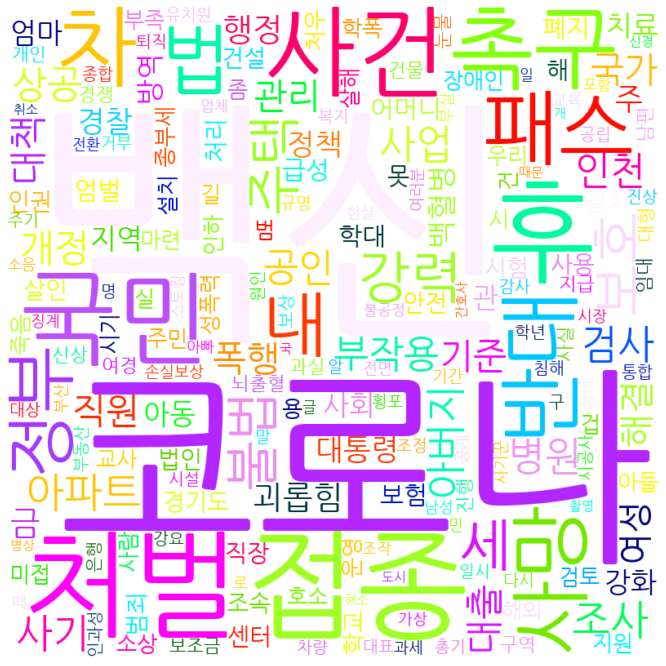

In [28]:
# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path='../data/NanumGothic.ttf',
                     colormap='gist_ncar', width=800, height=800)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 워드클라우드 png파일로 저장
wordcloud.to_file("../data/bluehouse_wordcloud.png")